## Visualizing Spatial Data
The Spatially Enabled Dataframe has a [`plot()`](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html?arcgis.features.GeoAccessor.from_featureclass#arcgis.features.GeoAccessor.plot) method that uses a syntax and symbology similar to [`matplotlib`](https://matplotlib.org) for visualizing features on a map. With this functionality, you can easily visualize aspects of your data both on a map and on a matplotlib chart using the same symbology!

Some unique characteristics of working with the visualization capabalities on the SDF:
- Uses Pythonic syntax
- Uses the same syntax as visualizing charts on Pandas DataFrames
- Uses symbology familiar to users of matplotlib
- Works on features and attributes simultaneously, eliminating to a great extent the need to iterate over all features (rows)
- Handles reading and writing to multiple formats aiding data conversion

Checkout the [Introduction to Spatially Enabled DataFrame](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/) guide to learn how to create a Spatially Enabled DataFrame.

In this guide, you will learn about:

 * [Quickstart](#Quickstart)
   * [Plotting the `DataFarme`](#Plotting-the-SpatialDataFrame)
 * [Understanding renderers](#Understanding-renderers)
   * [Supported renderers](#Supported-renderers)
   * [Visualizing unique values](#Visualizing-unique-values)
   * [Visualizing unique values with Arcade expressions](#Visualizing-Unique-Values-with-Arcade-Expressions)
   * [Visualizing classes with different colors](#Visualizing-classes-with-different-colors)
 * [ColorMaps and Colors](#Colormaps-and-Colors)
 * [Symbology for Simple Renderers](#Symbology-for-Simple-Renderers)
   * [Getting the different symbol styles](#Getting-the-different-symbol-styles)
   * [Visualizing line features suing simple renderers](#Visualizing-line-features-using-simple-symbols)
   * [Visualizing area features using simple renderers](#Visualizing-area-features-using-different-symbols)

## Quickstart
Let us read a census data on major cities and load that into a `Spatially Enabled DataFrame`

In [1]:
from arcgis import GIS
gis = GIS()
# create an anonymous connection to ArcGIS Online and get a public item
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
flayer = item.layers[0]

# Specify a SQL query and get a sub-set of the original data as a DataFrame
df = flayer.query(where="AGE_45_54 < 1500").sdf

# Visualize the top 5 records
df.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,"{""x"": -12462673.723706165, ""y"": 5384674.994080..."
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,"{""x"": -12506251.313993266, ""y"": 5341537.793529..."
2,4,Burley,city,ID,16,1611260,,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,"{""x"": -12667411.402393516, ""y"": 5241722.820606..."
3,6,Chubbuck,city,ID,16,1614680,,6,14655,13922,...,1281,172,370,3586,3.40,4961,229,3324,1408,"{""x"": -12520053.904151963, ""y"": 5300220.333409..."
4,12,Jerome,city,ID,16,1641320,,6,11403,10890,...,779,210,385,2640,3.44,3985,292,2219,1474,"{""x"": -12747828.64784961, ""y"": 5269214.8197742..."


> Note: If the above cell looks new to you, please checkout the [Introduction to Spatially Enabled DataFrame](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/) guide.

Let us create a map of the United States


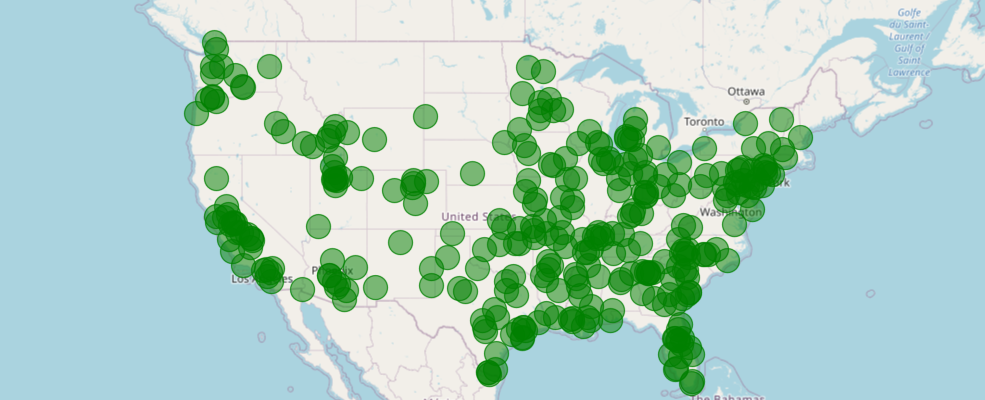

In [13]:
m1 = GIS().map("United States")
m1

In [3]:
m1.zoom = 4
m1.center = [39,-98]

### Plotting the DataFrame
You can quickly visualize the points by calling the `plot()` method off the `DataFrame`'s `spatial` accessor and passing the map you created above.

In [4]:
df.spatial.plot(map_widget= m1)

True

You can customize the symbols, their color, shape, border etc. like you would in a typical matplotlib plot. The rest of this guide talks about such customizations and suggestions to visualize your spatial and non-spatial data.

The code below plots the same set of points on a new map using a common structure used amongst many different Python packages for defining symbology. It is built off of the matplotlib libraries for simple, straightforward plotting. We'll explain some of the parameters below, and the [`plot()`](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#arcgis.features.SpatialDataFrame.plot) API Reference outlines more options.


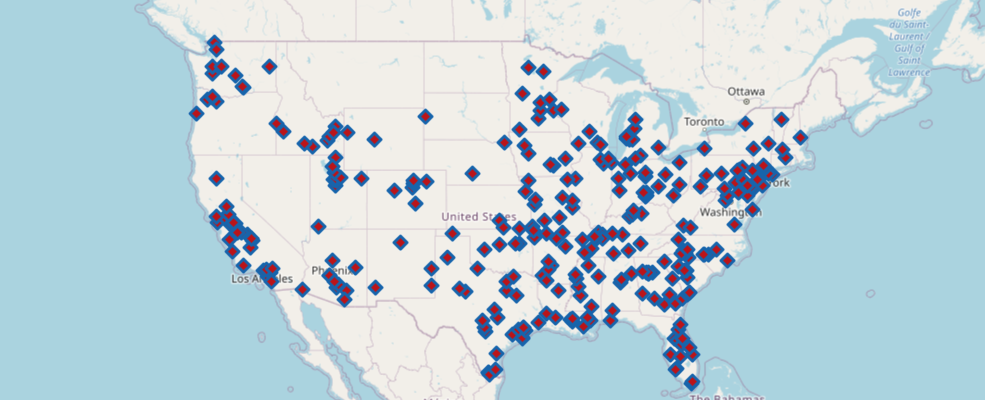

In [18]:
m2= GIS().map('United States', zoomlevel=4)
m2

In [16]:
m2.center=[39,-98]
df.spatial.plot(map_widget=m2,
                renderer_type='s',
                symbol_type='simple',
                symbol_style='d', # d - for diamonds
                colors='Reds_r',
                cstep=50,
                outline_color='Blues',
                marker_size=10)

True

If this type of plotting is new to you, this is a good time to checkout [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_summary.html) documentation and Pandas dataframe [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) documentation to get an idea.

## Understanding renderers

In the snippets above, you visualized all the features with the same symbology. While this helps understand the geographic distribution of your data, your `Spatially Enabled DataFrame` object can do much more. For instance, you can group the features based on certain attributes that you choose and symbolize each group by a certain color or size or both. To help with this, let us understand the concept of **renderers**.

[`Renderers`](https://developers.arcgis.com/documentation/common-data-types/renderer-objects.htm) define how to visually represent a `feature layer` by defining [`symbols`](https://developers.arcgis.com/documentation/common-data-types/symbol-objects.htm) to represent individual features. The `SeDF` provides you with functionality to control the way features appear by choosing the `symbol` the renderer uses.

Previous versions of the ArcGIS API for Python provided a method to specify a renderer manually, but you had to know details about the renderer before you drew your data. The [`map.add_layer()`]() method did not provide access to all options avialble for rendering datasets. The new visualization capabilities provided by the SEDF allow you to draw spatial data quickly and easily with access to more rendering options.

### Supported renderers  

The renderering options below are documented in further detail in the [`DatFrame Reference`](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html?highlight=from_layer#arcgis.features.GeoAccessor.plot). At a high level, you have the following renderers:

| Renderer     	| Syntax 	| Explanation                                                                                 	|
|--------------	|--------	|---------------------------------------------------------------------------------------------	|
| Simple       	| 's'    	| renders using one symbol only (the examples in [quickstart](#quickstart) above)             	|
| Unique       	| 'u'    	| renders each unique value with a different symbol. Suitable for categorical columns         	|
| Unique       	| 'u-a'    	| renders each unique value with a different symbol using arcade expressions. Suitable for categorical columns         	|
| Class breaks 	| 'c'    	| renders each group of values with a different color or size. Suitable for numerical columns 	|
| Heatmap      	| 'h'    	| renders density of point data as raster of varying colors                                   	|

### Visualizing unique values
Let us explore the major cities census data further and explore if there are any categorical columns

In [7]:
df.columns

Index(['AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44',
       'AGE_45_54', 'AGE_55_64', 'AGE_5_9', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'AGE_UNDER5', 'AMERI_ES', 'ASIAN', 'AVE_FAM_SZ',
       'AVE_HH_SZ', 'BLACK', 'CAPITAL', 'CLASS', 'FAMILIES', 'FEMALES',
       'FHH_CHILD', 'FID', 'HAWN_PI', 'HISPANIC', 'HOUSEHOLDS', 'HSEHLD_1_F',
       'HSEHLD_1_M', 'HSE_UNITS', 'MALES', 'MARHH_CHD', 'MARHH_NO_C',
       'MED_AGE', 'MED_AGE_F', 'MED_AGE_M', 'MHH_CHILD', 'MULT_RACE', 'NAME',
       'OBJECTID', 'OTHER', 'OWNER_OCC', 'PLACEFIPS', 'POP2010', 'POPULATION',
       'POP_CLASS', 'RENTER_OCC', 'SHAPE', 'ST', 'STFIPS', 'VACANT', 'WHITE'],
      dtype='object')

The `ST` column contains state names in abbreviation is a good candidate. We could symbolize the points such that all which fall under the same state get the same symbol:

In [8]:
df[['ST', 'NAME']].head()

,ST,NAME
0,AZ,Somerton
1,CA,Anderson
2,CA,Camp Pendleton South
3,CA,Citrus
4,CA,Commerce


In [9]:
gis = GIS()
m3 = gis.map('Reno, NV', zoomlevel=4)
m3

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

![unique value renderer](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_sdf_unique_value_renderer_1.png)

In [10]:
df.spatial.plot(map_widget = m3,
                renderer_type='u', # specify the unique value renderer using its notation 'u'
                col='ST'  # column to get unique values from
               )

True

By default, the API picks a unique color from the [`jet`](https://matplotlib.org/tutorials/colors/colormaps.html) colormap for each category (US State names in this case) and assigns it. You can override this by choosing your own colormap (`prism` for instance) and customizing the symbol style, symbol type, outline color, thickness, transparency etc. Keep reading to learn more about these customizations.

It is a good cartographic practice to not have too many unique values in your legend. Human eyes can only preceive so many colors and there are only a limited number of colors to choose from in a given color map before the colors become indistinguishable.

As a safe practice, the Python API caps the maximum number of unique values to `256`, the remaining are generalized and plotted with a default color. If you have several unique values, you should consider picking a different column that better represents your data or consider using a different renderer.

### Visualizing Unique Values with Arcade Expressions

Arcade is an expression language that can be used across the ArcGIS Platform. Whether writing simple scripts to control how features are rendered, or expressions to control label text, Arcade provides a simple scripting syntax to deliver these capabilities.

In the sense of visualization, Arcade expressions are used to create rich and dynamic symbology.  This example will follow the [JavaScript guide](https://developers.arcgis.com/javascript/latest/guide/arcade/index.html#visualization).

#### Obtain the Data

Access the enterprise to gain access to the FeatureLayer information and query it into a Spatially Enabled DataFrame.

In [3]:
item = gis.content.get("8444e275037549c1acab02d2626daaee")
flayer = item.layers[0]
df = flayer.query().sdf

In [4]:
fset = flayer.query()

In [5]:
from arcgis.geometry import Geometry
g = Geometry(fset.features[0].geometry)
g.as_arcpy

#### Write out the Arcade Expressions and Stops

Arcade expressions require the stops to be manually provided.  In this case, we first create an opacity visual variable based on a percent of dominant parties in registered citizens.

In [6]:
opacity_expression = ("var republican = $feature.MP06025a_B;var democrat = $feature.MP06024a_B;"
                      "var independent = $feature.MP06026a_B;var parties = [republican, democrat, independent];"
                      "var total = Sum(parties);var max = Max(parties);return (max / total) * 100;")
opacity_stops = [
    { "value": 33, "transparency": 0.05 * 255, "label": "< 33%" },
    { "value": 44, "transparency": 1.0 * 255, "label": "> 44%" }]

Next we develop another Arcade expression to obtain the majority party in a given county.

In [7]:
arcade_expression = ("var republican = $feature.MP06025a_B;var democrat = $feature.MP06024a_B;"
                     "var independent = $feature.MP06026a_B;var parties = [republican, democrat, independent];"
                     "return Decode( Max(parties),republican, 'republican', democrat, 'democrat',independent, "
                     "'independent','n/a' );")
uv = [{"label":"Democrat","symbol":{"type":"esriSFS","color":[0,195,255,255],
                                    "outline":{"type":"esriSLS","color":[0,0,0,51],
                                               "width":0.5,"style":"esriSLSSolid"},
                                    "style":"esriSFSSolid"},"value":"democrat"},
      {"label":"Republican","symbol":{"type":"esriSFS","color":[255,0,46,255],"outline":{
          "type":"esriSLS","color":[0,0,0,51],"width":0.5,"style":"esriSLSSolid"},
                                      "style":"esriSFSSolid"},"value":"republican"},
      {"label":"Independent/other party","symbol":{"type":"esriSFS","color":[250,255,0,255],
                                                   "outline":{"type":"esriSLS","color":[0,0,0,51],
                                                              "width":0.5,"style":"esriSLSSolid"},
                                                   "style":"esriSFSSolid"},"value":"independent"}]

In [8]:
gis = GIS()
m3_ua = gis.map('United States', zoomlevel=4)
m3_ua

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_sdf_unique_value_arcade.PNG)

#### Visualize the Data

Provide the color scheme, and the `arcade_expression` to render the data in a dynamic/rich form.

In [9]:
df.spatial.plot(colors='coolwarm',
                map_widget=m3_ua,
                renderer_type='u-a',  # 'u-a' stands for uniqe value with arcade expression
                unique_values=uv,
                opacity_stops=opacity_stops,
                opacity_expression=opacity_expression,
                arcade_expression=arcade_expression)

True

### Visualizing classes with different colors
Often, you may want to classify the numerical values in your data into groups and visualize them on a map. You can accomplish this with a **class break renderer** which splits your data into specific number of groups and uses **color** to differentiate each group. You can choose the algorithm that performs the class splits or go with the defualt.

Let us visualize the same major cities point dataset using its `POPULATION` column.

In [12]:
df[['ST', 'NAME', 'POPULATION']].head()

,ST,NAME,POPULATION
0,AZ,Somerton,14980
1,CA,Anderson,10239
2,CA,Camp Pendleton South,11869
3,CA,Citrus,11195
4,CA,Commerce,13009


In [14]:
m4 = gis.map('USA', zoomlevel=4)
m4

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

![class color renderer](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_sdf_class_breaks_color_1.png)

In [15]:
df.spatial.plot(map_widget=m4,
               renderer_type='c',  # for class breaks renderer
               method='esriClassifyNaturalBreaks',  # classification algorithm
               class_count=20,  # choose the number of classes
               col='POPULATION',  # numeric column to classify
               cmap='prism',  # color map to pick colors from for each class
               alpha=0.7  # specify opacity
               )

True

You can take this further by plotting a histogram of the same `POPULATION` column and try to match the colors. To get the class breaks for the above map, you can inspect the layer definition from `MapView` object as shown below:

In [25]:
dict(m4.layers[0].layer.layerDefinition.drawingInfo.renderer).keys()

dict_keys(['type', 'visualVariables', 'rotationType', 'minValue', 'field', 'defaultSymbol', 'defaultLabel', 'classificationMethod', 'classBreakInfos'])

In [26]:
class_breaks = m4.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
print(len(class_breaks))

20


We can loop through each of the class breaks and obtain the min, max values and the colors for each class.

In [29]:
cbs_list = []
cmap_list = []
for cb in class_breaks:
    print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])

7809.0 - 10844.421052631578
10844.421052631578 - 13879.842105263157
13879.842105263157 - 16915.263157894737
16915.263157894737 - 19950.684210526313
19950.684210526313 - 22986.105263157893
22986.105263157893 - 26021.526315789473
26021.526315789473 - 29056.94736842105
29056.94736842105 - 32092.36842105263
32092.36842105263 - 35127.78947368421
35127.78947368421 - 38163.21052631579
38163.21052631579 - 41198.63157894737
41198.63157894737 - 44234.05263157895
44234.05263157895 - 47269.47368421053
47269.47368421053 - 50304.8947368421
50304.8947368421 - 53340.31578947368
53340.31578947368 - 56375.73684210526
56375.73684210526 - 59411.15789473684
59411.15789473684 - 62446.57894736842
62446.57894736842 - 65482.0
65482.0 - 65482.0


Now that we have the individual class splits and the colors, we can plot a histogram using the same breaks and colors.

Text(0.5,1,'Histogram of POPULATION column')

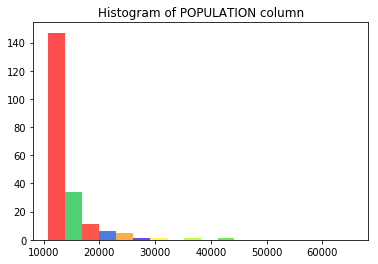

In [30]:
import matplotlib.pyplot as plt
# build a histogram for the same class breaks
n, bins, patches = plt.hist(df['POPULATION'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram of POPULATION column')

The shape and color of the bars in the histogram match with the number and color of major cities drawn on the map.

Thus using the `Spatially Enabled DataFrame` we can easily visualize both the spatial and numeric distribution of data using the same symbology.

## Colormaps and Colors
The examples above use the default colormap `jet`. However you can customize them by using the `colors` paramater. You can specify colors as:
 * a string representing [named colors](https://matplotlib.org/examples/color/named_colors.html)
 * an array of [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) values
 * a named [color ramp](https://matplotlib.org/examples/color/colormaps_reference.html). 

#### Color Array

RGB + Alpha values can be used to create colors for symbols called in the `plot` method.  RGB stands for red, green, and blue respectively. Each RGB value is a value between 0-255, and the alpha value is a number between 0-255.

**Example to produce :**

    color = [255,0,100,1]

The above example produces a purplish color. Many websites provide details about using colors. For example, see [here](https://www.rapidtables.com/web/color/RGB_Color.html) for a color codes chart.

#### Color Maps

A color map is a collection of string values that can be given to generate a series of related colors from a defined set.

Color maps can be viewed here: https://matplotlib.org/examples/color/colormaps_reference.html

#### Color Map Helpers

To better understand the syntax for each input type, the ArcGIS API for Python provides some helper functions:

In [31]:
from arcgis.mapping import display_colormaps

The **display_colormaps** function provides a quick, easy way to visualize the pre-defined set of colormaps you can use.  

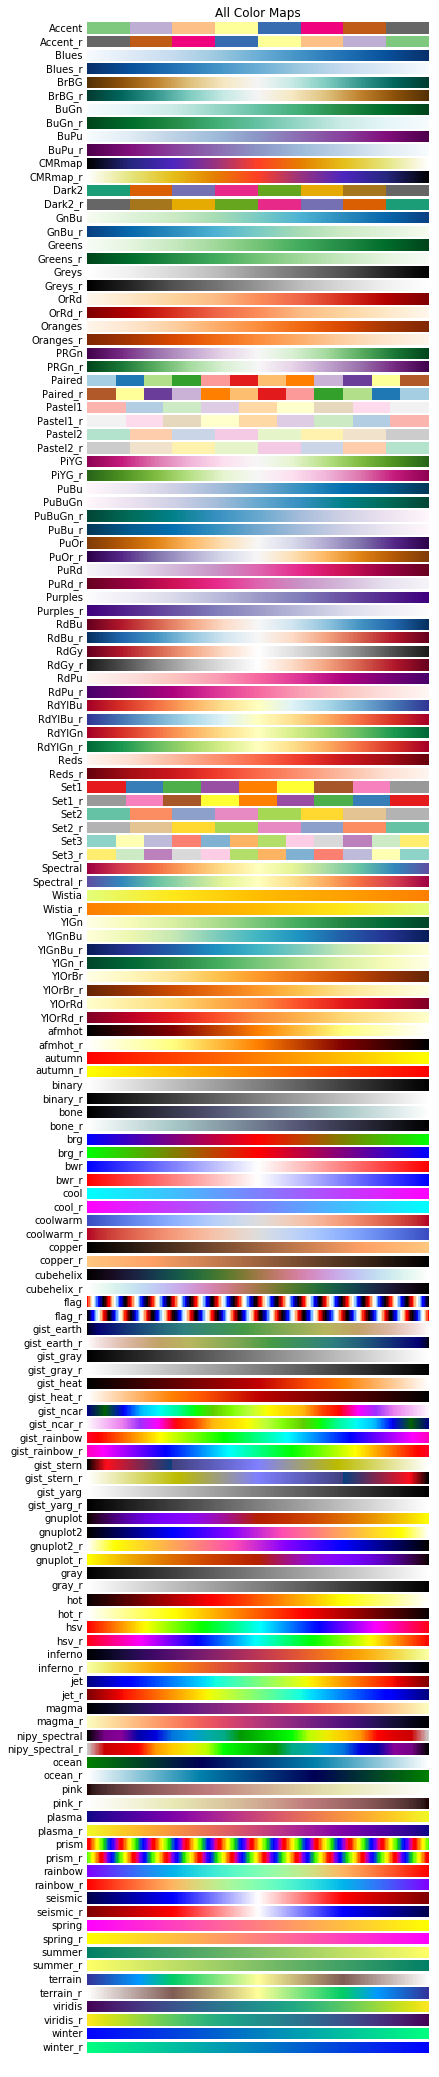

In [32]:
display_colormaps()

You can retrieve a list of colormaps as well:

In [33]:
from arcgis.mapping import symbol

colormaps = symbol.ALLOWED_CMAPS
for a,b,c,d,e in zip(colormaps[::5], colormaps[1::5], colormaps[2::5], colormaps[3::5], colormaps[4::5]):
    print("{:<20}{:<20}{:<20}{:<20}{:<}".format(a,b,c,d,e))

Accent              Accent_r            Blues               Blues_r             BrBG
BrBG_r              BuGn                BuGn_r              BuPu                BuPu_r
CMRmap              CMRmap_r            Dark2               Dark2_r             GnBu
GnBu_r              Greens              Greens_r            Greys               Greys_r
OrRd                OrRd_r              Oranges             Oranges_r           PRGn
PRGn_r              Paired              Paired_r            Pastel1             Pastel1_r
Pastel2             Pastel2_r           PiYG                PiYG_r              PuBu
PuBuGn              PuBuGn_r            PuBu_r              PuOr                PuOr_r
PuRd                PuRd_r              Purples             Purples_r           RdBu
RdBu_r              RdGy                RdGy_r              RdPu                RdPu_r
RdYlBu              RdYlBu_r            RdYlGn              RdYlGn_r            Reds
Reds_r              Set1                Set1_r     

You can enter a list of color ramp names as input to the `display_colormaps` function to filter the output:

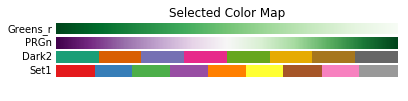

In [34]:
display_colormaps(['Greens_r', 'PRGn', 'Dark2', 'Set1'])

The examples above used `jet` which is the default and some used `prism` both of which can be seen in the list above. You can customize your charts by using a different colormap of your choice.

## Symbology for Simple Renderers

The ArcGIS API for Python provides you the ability to set symbol types so you control data appearance. The  [`show_styles`]() function in the `arcgis.mapping` module assists you with the syntax to define symbols.

#### Getting the different symbol styles

In [35]:
from arcgis.mapping import show_styles

In [36]:
# get the styles that are relevant to the current geometry type (points)
show_styles(df.spatial.geometry_type[0])  # the DataFrame in this example is of Point type

,MARKER,ESRI_STYLE
0,o,Circle (default)
1,+,Cross
2,d,Diamond
3,s,Square
4,x,X


In [37]:
show_styles('Polygon')

,MARKER,ESRI_STYLE
0,\,Backward Diagonal
1,/,Forward Diagonal
2,|,Vertical Bar
3,-,Horizontal Bar
4,x,Diagonal Cross
5,+,Cross
6,s,Solid Fill (default)


In [38]:
show_styles('Line')

,MARKER,ESRI_STYLE
0,s,Solid (default)
1,-,Dash
2,-.,Dash Dot
3,-..,Dash Dot Dot
4,.,Dot
5,--,Long Dash
6,--.,Long Dash Dot
7,n,Null
8,s-,Short Dash
9,s-.,Short Dash Dot


For instance, you can represent the same set of points using square symbols instead of default circle using the snippet shown below:

In [ ]:
m7 = GIS().map('United States', 4)
m7

![map of US squares](http://esri.github.io/arcgis-python-api/notebooks/nbimages/13_4_map_dfplot2.png)

In [ ]:
m7.center = [39, -98]
df.spatial.plot(map_widget=m7,
        symbol_type='simple',
        symbol_style='s',  # for square
        cmap='Greens_r',   # color map is Greens_r for green reversed
        cstep=35,   # the individual color in the colormap
        outline_color='binary',
        marker_size=5,
        line_width=.5,)

### Visualizing line features using simple symbols
Let us search for USA freeway layer and visualize it by looping through the different line symbols

In [ ]:
search_result = gis.content.search('title:USA freeway system AND owner:esri', 
                                  item_type = 'Feature Layer')
freeway_item = search_result[0]
freeway_item

In [ ]:
freeway_sdf = freeway_item.layers[0].query().sdf
freeway_sdf.head()

In [ ]:
m8 = gis.map('USA', 10)
m8

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_sdf_lines_animated_1.gif)

In [ ]:
m8.center=[34.05,-118.2]
m8.zoom=12
m8.basemap='dark-gray'

In [ ]:
import time
for row, style in show_styles('Line').iterrows():
    m8.remove_layers()
    time.sleep(1)  # sleep for 1 second so animation can finish
    print(style['ESRI_STYLE'] + " : " + style['MARKER'])
    freeway_sdf.spatial.plot(map_widget=m8,
                     cmap='Spectral',  # user a different color map
                     symbol_type='simple',
                     symbol_style=style['MARKER']
                    )

### Visualizing area features using different symbols

In [ ]:
from arcgis.features import FeatureLayer
fl = FeatureLayer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/Census/MapServer/2")
county_sdf = fl.query("STATE_NAME='Washington'", out_sr=4326).sdf
county_sdf.head()

In [ ]:
m9 = gis.map('Seattle, WA', zoomlevel=6)
m9.basemap='gray'
m9

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_sdf_animate_polygons_1.gif)

In [ ]:
for idx, style in show_styles('Polygon').iterrows():
    m9.remove_layers()
    time.sleep(0.5)
    
    print(style['ESRI_STYLE'] + " : " + style['MARKER'])
    county_sdf.spatial.plot(map_widget=m9,
                           cmap = 'RdPu',  # use a red to purple color map
                           symbol_type='simple',
                           symbol_style=style['MARKER'],
                           outline_style='s',
                           outline_color=[0,0,0,255],
                           line_width=1.0)

**Conclusion**


The `Spatially Enabled DataFrame` gives you powerful visualization capabilities that allows you to plot your data on the interactive map widget. You specify colors and symbols using the same syntax that you would specify for a normal Pandas or a matplotlib plot.